In [1]:
%cd ..
%load_ext autoreload
%autoreload 2


/home/samuel.assis/MatchImm/MatchImmNet


In [2]:
from pyGeoMatchImm.embeddings.positional import PositionalCDREmbedder
import torch




ImportError: cannot import name 'PositionalCDREmbedder' from 'pyGeoMatchImm.embeddings.positional' (/home/samuel.assis/MatchImm/MatchImmNet/pyGeoMatchImm/embeddings/positional.py)

In [ ]:
chains = ['E', 'E', 'D', 'D', 'E', 'D', 'E']
residues = torch.tensor([30, 31, 110, 85, 60, 115, 2])

embedder = PositionalCDREmbedder()

embedder(residues, chains)



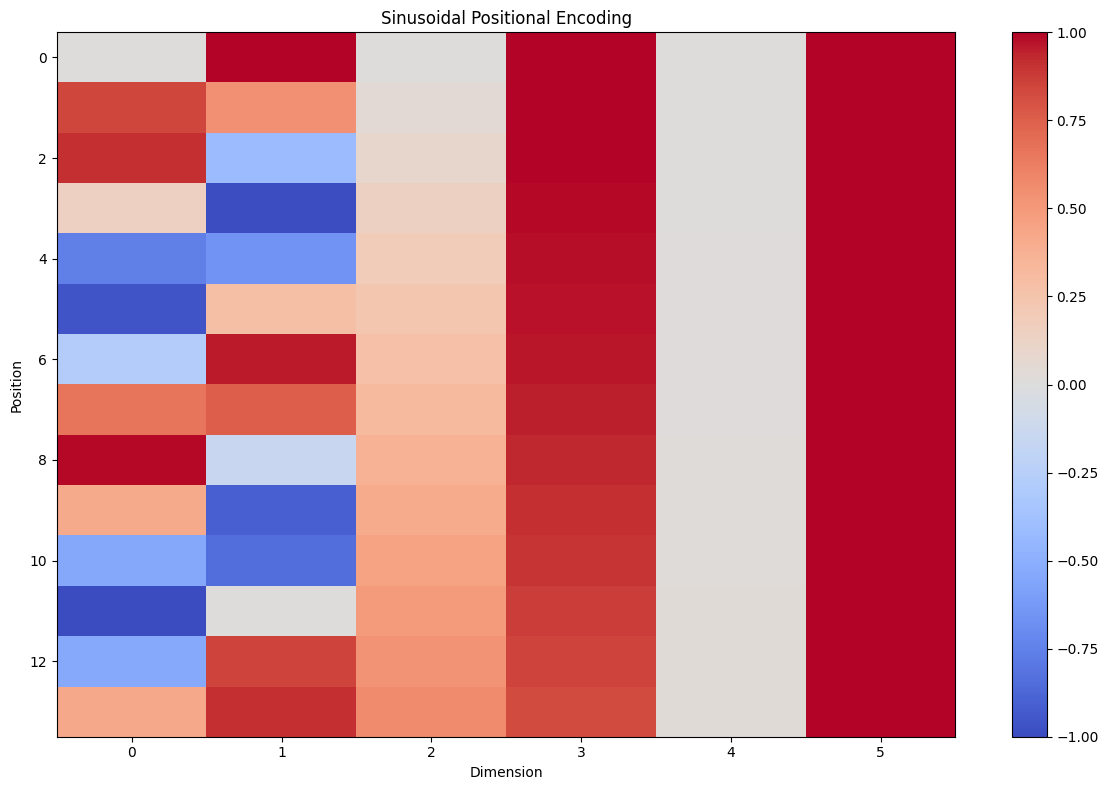

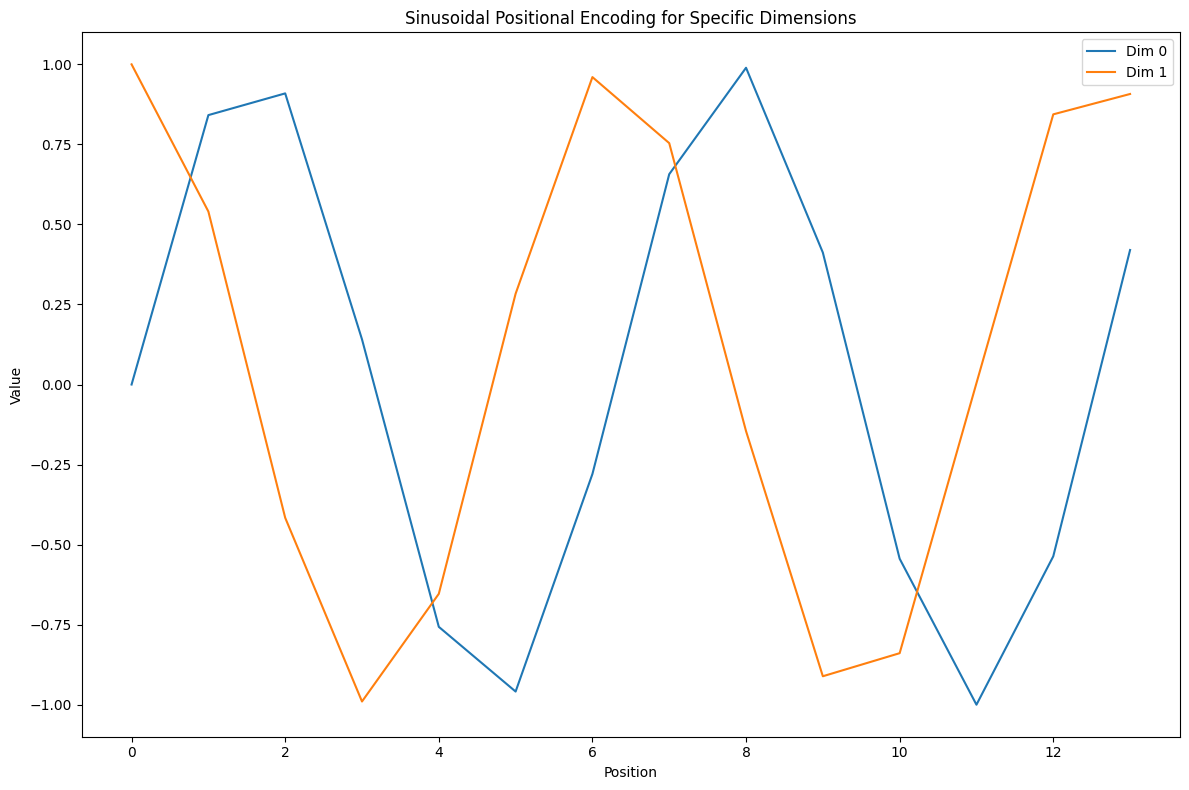

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def sinusoidal_positional_encoding(max_position, d_model):
    position = np.arange(max_position)[:, np.newaxis]
    # The original formula pos / 10000^(2i/d_model) is equivalent to pos * (1 / 10000^(2i/d_model)).
    # I use the below version for numerical stability
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    
    pe = np.zeros((max_position, d_model))
    pe[:, 0::2] = np.sin(position * div_term)
    pe[:, 1::2] = np.cos(position * div_term)
    
    return pe

max_position = 14  # Maximum sequence length
d_model = 6        # Embedding dimension

pe = sinusoidal_positional_encoding(max_position, d_model)

plt.figure(figsize=(12, 8))
plt.imshow(pe, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Sinusoidal Positional Encoding')
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
dimensions = [0, 1]
for d in dimensions:
    plt.plot(pe[:, d], label=f'Dim {d}')
plt.legend()
plt.title('Sinusoidal Positional Encoding for Specific Dimensions')
plt.xlabel('Position')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

tensor([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.]])


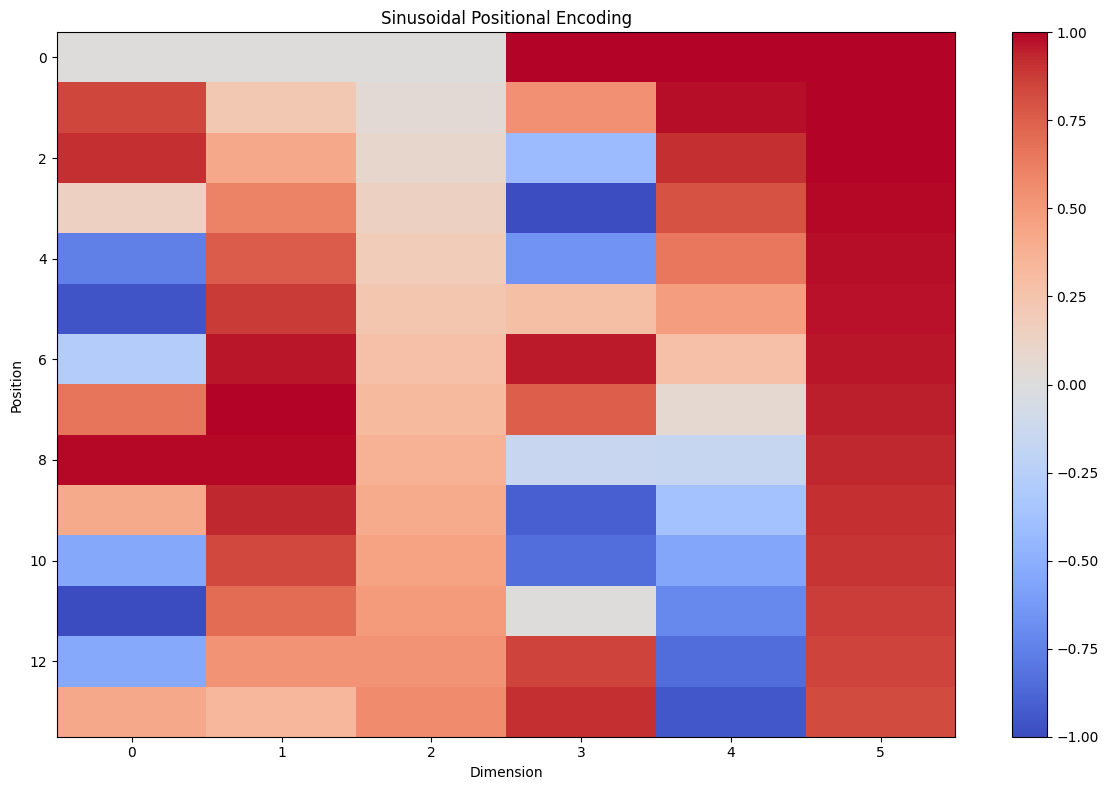

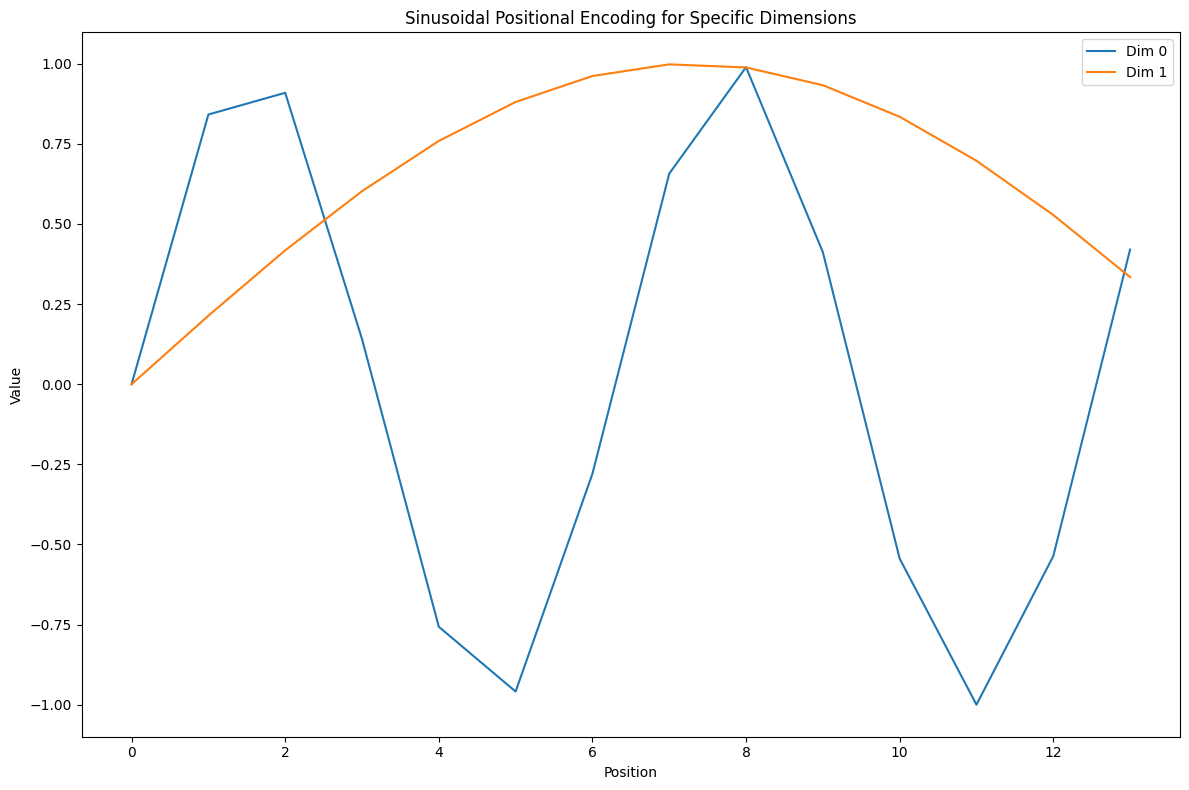

In [10]:
from torch_geometric.nn.encoding import PositionalEncoding
import torch

# Parameters
max_position = 14
d_model = 6

# Transformer-compatible base frequency
base_freq = 10000 ** (-2 / d_model)

# Positional encoding module
pe_layer = PositionalEncoding(
    out_channels=d_model,
    base_freq=base_freq,
    granularity=1
)

# Positions
positions = np.arange(max_position)[ :, np.newaxis ]
positions = torch.tensor(positions, dtype=torch.float32)
# Compute PE
print(positions)
pe = pe_layer(positions).detach().cpu().numpy()


plt.figure(figsize=(12, 8))
plt.imshow(pe, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Sinusoidal Positional Encoding')
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
dimensions = [0, 1]
for d in dimensions:
    plt.plot(pe[:, d], label=f'Dim {d}')
plt.legend()
plt.title('Sinusoidal Positional Encoding for Specific Dimensions')
plt.xlabel('Position')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

tensor([0., 2., 4.])


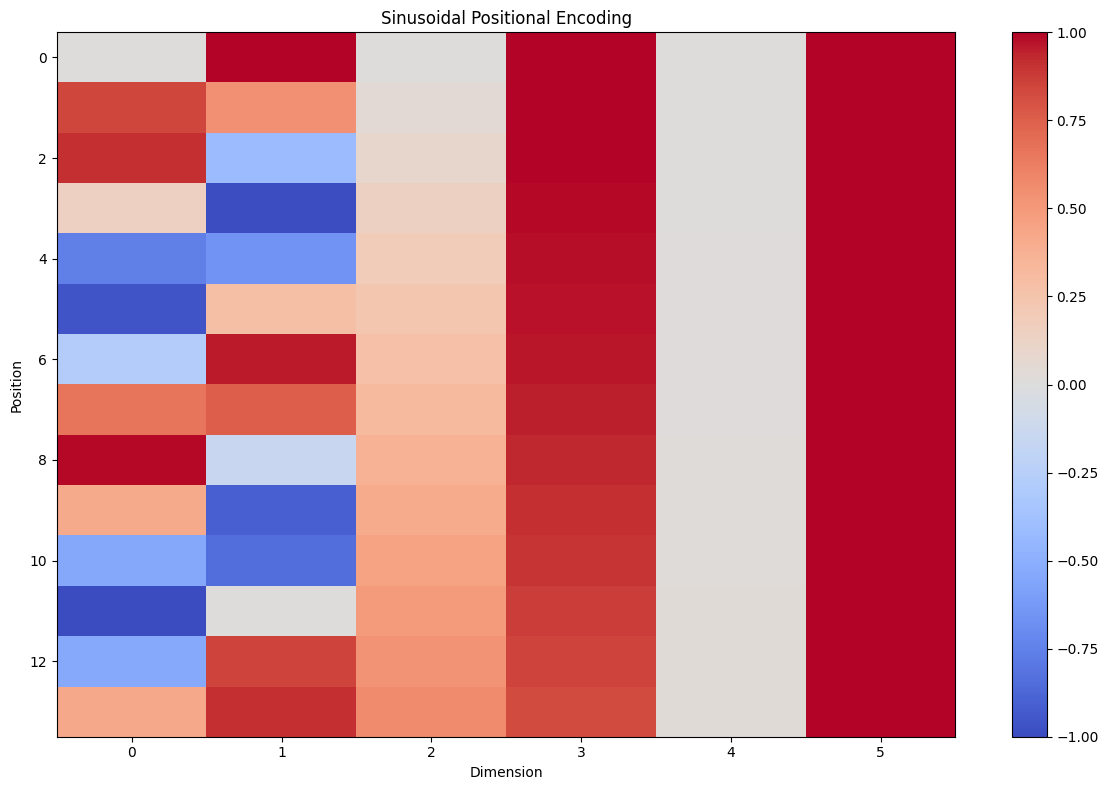

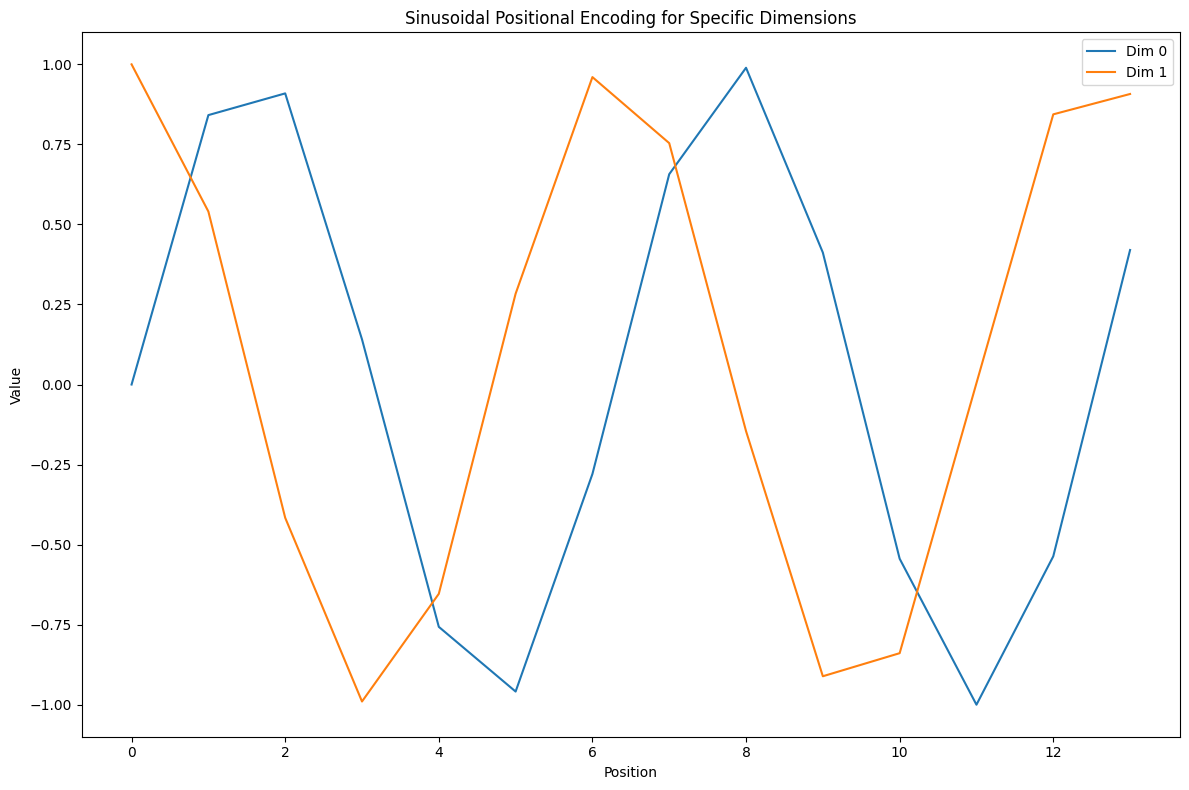

In [ ]:
class EpitopeSinusoidalPE(torch.nn.Module):
    def __init__(self, d_model):
        super().__init__()
        i = torch.arange(0, d_model, 2, dtype=torch.float32)
        print(i)
        div_term = torch.exp(-torch.log(torch.tensor(10000.0)) * i / d_model) # Changed 10000 to 1000 for variation
        self.register_buffer("div_term", div_term)

    def forward(self, positions_len):
        """Compute sinusoidal positional encodings.
        Args:
            positions_len (int): Length of the positions sequence.
        Returns:
            torch.Tensor: Positional encodings of shape (seq_len, d_model)."""
        
        positions = torch.arange(0, positions_len).unsqueeze(1)
        pe = torch.zeros(positions.size(0), self.div_term.size(0) * 2,
                         device=positions.device)
        
        pe[:, 0::2] = torch.sin(positions * self.div_term)
        pe[:, 1::2] = torch.cos(positions * self.div_term)
        
        return pe
    
# Parameters
max_position = 14
d_model = 6

# Positions
positions = np.arange(max_position)
positions = torch.tensor(positions, dtype=torch.float32)
# Compute PE
pe_layer = TransformerSinusoidalPE(d_model=d_model)

pe = pe_layer(max_position).detach().cpu().numpy()


plt.figure(figsize=(12, 8))
plt.imshow(pe, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Sinusoidal Positional Encoding')
plt.xlabel('Dimension')
plt.ylabel('Position')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
dimensions = [0, 1]
for d in dimensions:
    plt.plot(pe[:, d], label=f'Dim {d}')
plt.legend()
plt.title('Sinusoidal Positional Encoding for Specific Dimensions')
plt.xlabel('Position')
plt.ylabel('Value')
plt.tight_layout()
plt.show()
